In [1363]:
import pandas as pd

wine = pd.read_csv(r"C:\Users\Ahsan\Downloads\archive (1).zip")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [1364]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [1365]:
wine['density'].value_counts()

density
0.99760    27
0.99720    25
0.99680    22
0.99940    22
0.99640    21
           ..
0.99410     1
0.99314     1
0.99402     1
0.99574     1
0.99651     1
Name: count, Length: 388, dtype: int64

In [1366]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [1367]:
%matplotlib inline

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

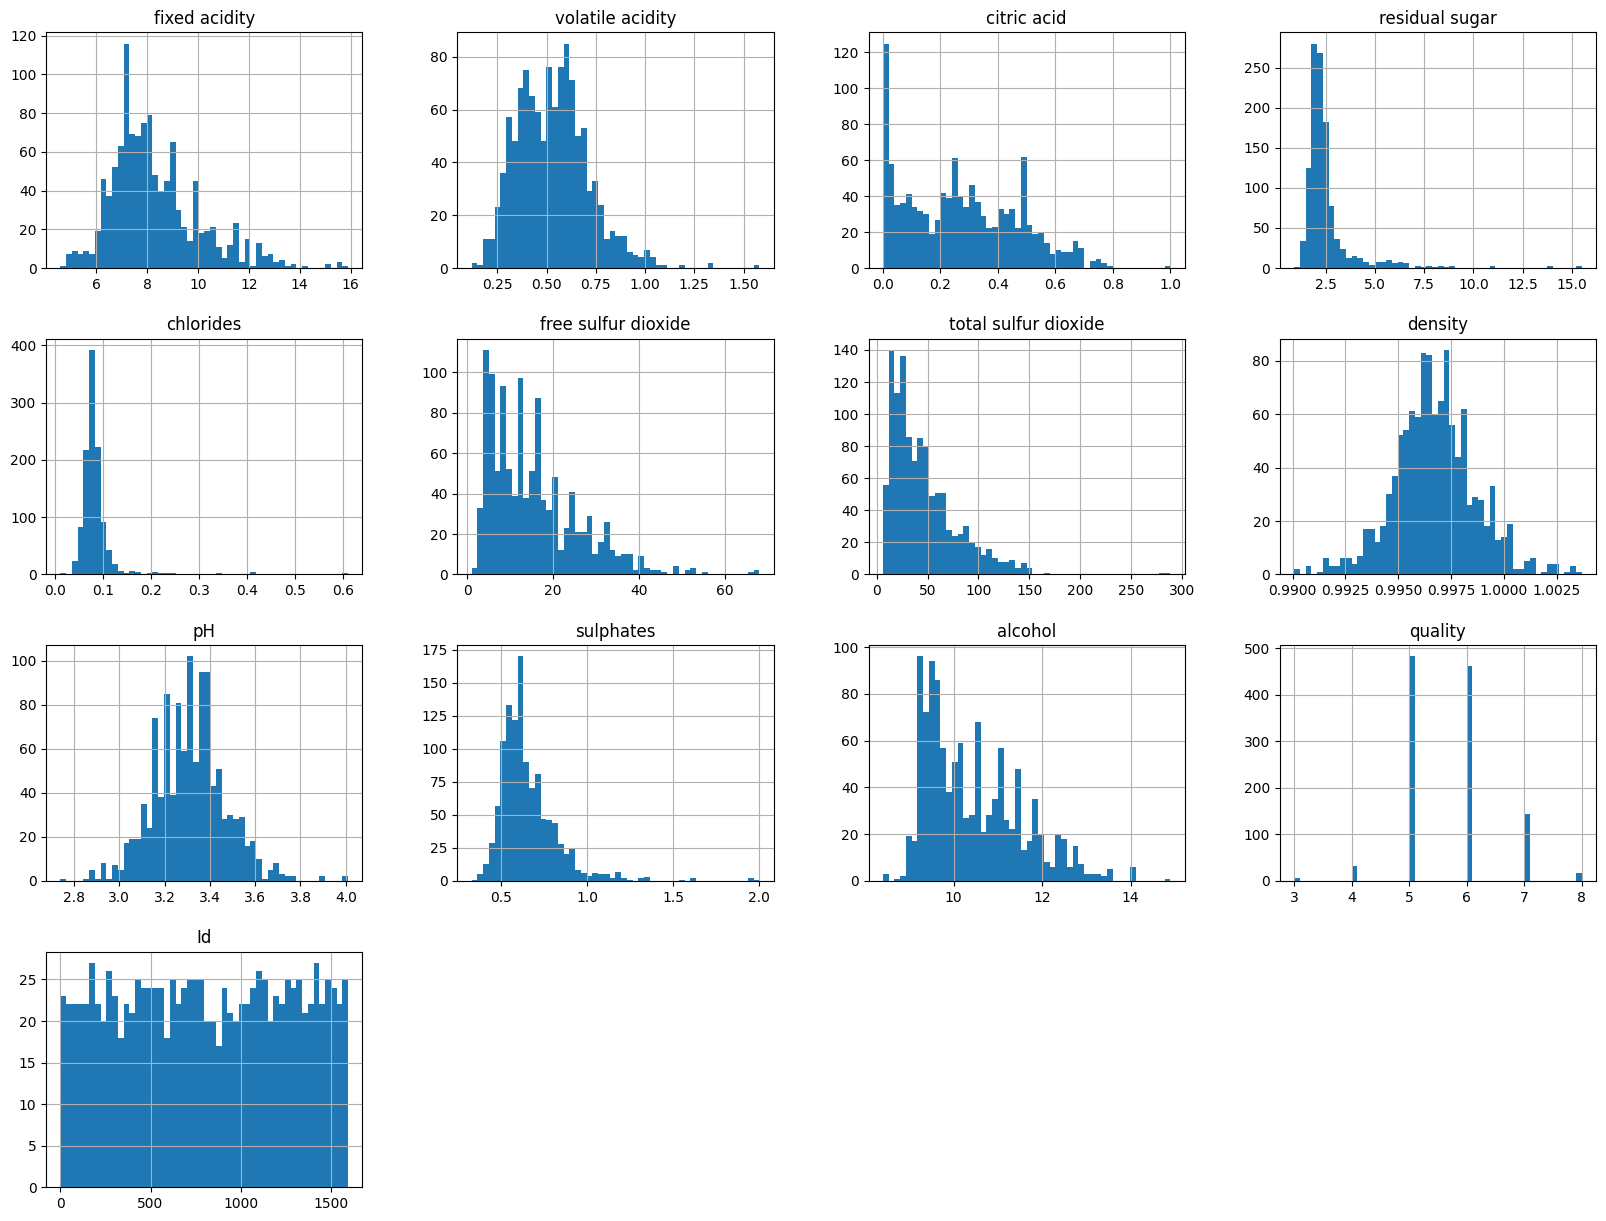

In [1368]:
import matplotlib.pyplot as plt

wine.hist(bins=50,figsize=(20,15))

In [1369]:
# Train _ Test Splitting

In [1370]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(wine, test_size=0.2 , random_state=42)
print(len(f"Rows in train set :{len(train_set)}\nRows in test set : {len(test_set)}\n"))

46


In [1371]:
from sklearn.model_selection import StratifiedShuffleSplit

# Temporarily bin 'density' into discrete categories
density_binned = pd.cut(
    wine["density"],
    bins=[0.990, 0.994, 0.996, 0.998, 1.000, 1.004],
    labels=[1, 2, 3, 4, 5]
)

# Apply StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(wine, density_binned):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

In [1372]:
strat_test_set['density'].value_counts()

density
0.99780    7
0.99820    7
0.99720    6
0.99640    5
0.99760    5
          ..
0.99395    1
0.99661    1
0.99492    1
0.99801    1
1.00015    1
Name: count, Length: 145, dtype: int64

In [1373]:
strat_train_set['density'].value_counts()

density
0.99760    22
0.99720    19
0.99680    18
0.99800    18
0.99940    18
           ..
0.99157     1
0.99808     1
0.99356     1
0.99761     1
0.99358     1
Name: count, Length: 354, dtype: int64

In [1374]:
#Looking for correlation

In [1375]:
wine = strat_test_set.copy()

In [1376]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.491932
sulphates               0.330302
citric acid             0.277098
fixed acidity           0.199027
Id                      0.151748
residual sugar         -0.045352
chlorides              -0.086345
free sulfur dioxide    -0.099600
density                -0.145189
pH                     -0.154601
total sulfur dioxide   -0.276926
volatile acidity       -0.377502
Name: quality, dtype: float64

array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='density', ylabel='quality'>,
        <Axes: xlabel='residual sugar', ylabel='quality'>,
        <Axes: xlabel='volatile acidity', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='density'>,
        <Axes: xlabel='density', ylabel='density'>,
        <Axes: xlabel='residual sugar', ylabel='density'>,
        <Axes: xlabel='volatile acidity', ylabel='density'>],
       [<Axes: xlabel='quality', ylabel='residual sugar'>,
        <Axes: xlabel='density', ylabel='residual sugar'>,
        <Axes: xlabel='residual sugar', ylabel='residual sugar'>,
        <Axes: xlabel='volatile acidity', ylabel='residual sugar'>],
       [<Axes: xlabel='quality', ylabel='volatile acidity'>,
        <Axes: xlabel='density', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>]],
      dtype=object)

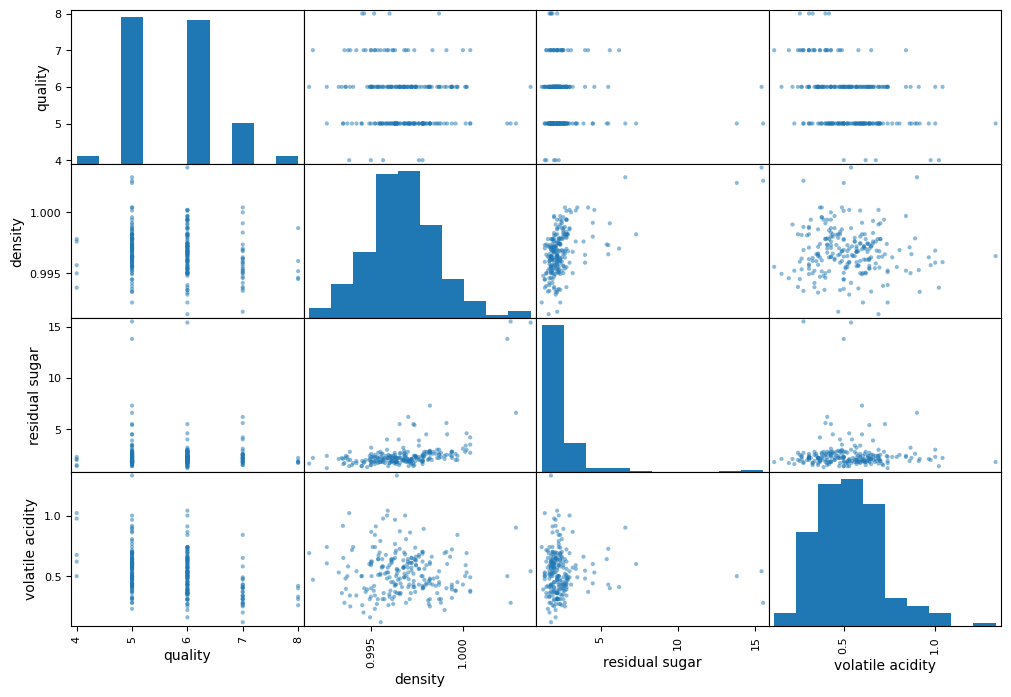

In [1377]:
from pandas.plotting import scatter_matrix
attributes = ["quality", "density", "residual sugar", "volatile acidity"]
scatter_matrix(wine[attributes], figsize=(12, 8))


<Axes: xlabel='density', ylabel='quality'>

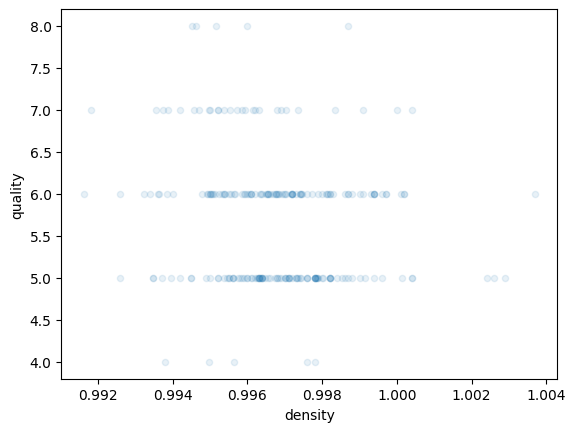

In [1378]:
wine.plot(kind="scatter", x="density", y="quality", alpha=0.1)

In [1379]:
# trying out attr combination

In [1380]:
wine["alcohol_per_density"] = wine["quality"] / wine["density"]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,alcohol_per_density
772,9.2,0.310,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7,1093,7.027054
769,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1090,8.044162
560,7.0,0.570,0.00,2.0,0.190,12.0,45.0,0.99676,3.31,0.60,9.4,6,780,6.019503
1116,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,1563,5.022804
126,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,9.6,5,178,5.015548


In [1381]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol_per_density     0.999907
alcohol                 0.491932
sulphates               0.330302
citric acid             0.277098
fixed acidity           0.199027
Id                      0.151748
residual sugar         -0.045352
chlorides              -0.086345
free sulfur dioxide    -0.099600
density                -0.145189
pH                     -0.154601
total sulfur dioxide   -0.276926
volatile acidity       -0.377502
Name: quality, dtype: float64

<Axes: xlabel='density', ylabel='quality'>

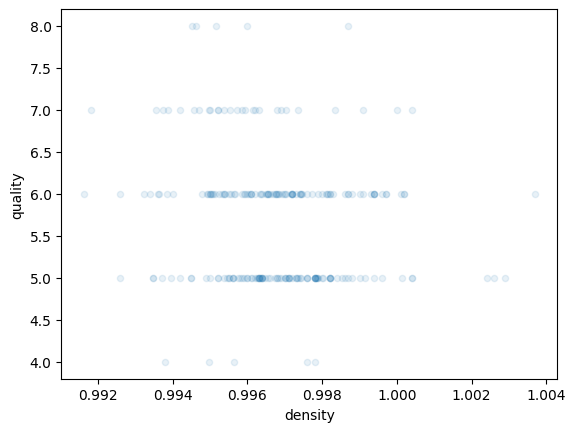

In [1382]:
wine.plot(kind="scatter", x="density", y="quality", alpha=0.1)

In [1486]:
# Drop 'Id' and 'quality' to keep only the input features
wine_features = strat_train_set.drop(["Id", "quality"], axis=1)

# Keep only the 'quality' column as the target variable
wine_labels = strat_train_set["quality"]                         # Target/label



In [1487]:
#Missing attr

In [1488]:
a = wine.dropna(subset=["density"])  #option 1
a.shape

(229, 14)

In [1489]:
wine.drop("density",axis=1).shape  #option 2

(229, 13)

In [1490]:
median =wine["density"].median()  #option 3
wine["density"].fillna(median) 

772     0.99615
769     0.99451
560     0.99676
1116    0.99546
126     0.99690
         ...   
1006    0.99940
301     0.99970
203     1.00015
222     0.99940
525     0.99630
Name: density, Length: 229, dtype: float64

In [1491]:
wine.describe()    #before we started filling missing att

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,alcohol_per_density
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,8.256769,0.529127,0.267729,2.527074,0.089852,15.716157,46.165939,0.996760,3.322751,0.657205,10.416812,5.694323,786.711790,5.713071
std,1.679523,0.180789,0.203164,1.669761,0.049674,10.238076,31.629551,0.001884,0.161332,0.151689,1.066413,0.790854,466.509449,0.795423
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,8.000000,0.991620,2.880000,0.420000,8.800000,4.000000,0.000000,4.008819
25%,7.100000,0.400000,0.070000,1.900000,0.070000,7.000000,23.000000,0.995570,3.220000,0.550000,9.500000,5.000000,377.000000,5.016051
50%,7.900000,0.510000,0.240000,2.200000,0.079000,13.000000,37.000000,0.996750,3.320000,0.620000,10.100000,6.000000,770.000000,6.005405
75%,9.100000,0.635000,0.440000,2.600000,0.092000,21.000000,60.000000,0.997800,3.420000,0.730000,11.100000,6.000000,1184.000000,6.026032
max,13.800000,1.330000,0.760000,15.500000,0.467000,55.000000,143.000000,1.003690,4.010000,1.310000,13.566667,8.000000,1594.000000,8.044162


In [1492]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(wine)

SimpleImputer(strategy='median')

In [1493]:
imputer.statistics_ 

array([7.90000000e+00, 5.10000000e-01, 2.40000000e-01, 2.20000000e+00,
       7.90000000e-02, 1.30000000e+01, 3.70000000e+01, 9.96750000e-01,
       3.32000000e+00, 6.20000000e-01, 1.01000000e+01, 6.00000000e+00,
       7.70000000e+02, 6.00540486e+00])

In [1494]:
x = imputer.transform(wine)
wine_al = pd.DataFrame(x,columns=wine.columns)
wine_al.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,alcohol_per_density
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,8.256769,0.529127,0.267729,2.527074,0.089852,15.716157,46.165939,0.996760,3.322751,0.657205,10.416812,5.694323,786.711790,5.713071
std,1.679523,0.180789,0.203164,1.669761,0.049674,10.238076,31.629551,0.001884,0.161332,0.151689,1.066413,0.790854,466.509449,0.795423
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,8.000000,0.991620,2.880000,0.420000,8.800000,4.000000,0.000000,4.008819
25%,7.100000,0.400000,0.070000,1.900000,0.070000,7.000000,23.000000,0.995570,3.220000,0.550000,9.500000,5.000000,377.000000,5.016051
50%,7.900000,0.510000,0.240000,2.200000,0.079000,13.000000,37.000000,0.996750,3.320000,0.620000,10.100000,6.000000,770.000000,6.005405
75%,9.100000,0.635000,0.440000,2.600000,0.092000,21.000000,60.000000,0.997800,3.420000,0.730000,11.100000,6.000000,1184.000000,6.026032
max,13.800000,1.330000,0.760000,15.500000,0.467000,55.000000,143.000000,1.003690,4.010000,1.310000,13.566667,8.000000,1594.000000,8.044162


In [1495]:
#PIPELINE CREATING(automate)

In [1496]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [1497]:
wine_features = my_pipeline.fit_transform(wine)
wine_features.shape

(229, 14)

In [1498]:
#Selecting a desired model 

In [1499]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the dataset (includes alcohol as one feature)
data = load_wine()
alcohol_features = data.data     # features: 13 columns like alcohol, pH, etc.
alcohol_labels = data.target     # target classes (0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    alcohol_features, alcohol_labels, test_size=0.2, random_state=42
)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 2. Logistic Regression
#log_model = LogisticRegression(max_iter=1000)
#log_model.fit(X_train, y_train)

# 3. Decision Tree Classifier
#tree_model = DecisionTreeClassifier()
#tree_model.fit(X_train, y_train)

# 4. K-Nearest Neighbors Classifier
#knn_model = KNeighborsClassifier()
#nn_model.fit(X_train, y_train)

 #5. Support Vector Classifier
#svm_model = SVC()
#svm_model.fit(X_train, y_train)





RandomForestClassifier()

In [1500]:
# scale features

In [1501]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1502]:
#Train the classifier

In [1503]:
#model 
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Saving the data

In [ ]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']